In [3]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade pip

Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\python39\python.exe -m pip install --upgrade pip' command.

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Using cached scikit_learn-0.24.2-cp39-cp39-win_amd64.whl (6.9 MB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached scipy-1.6.3-cp39-cp39-win_amd64.whl (32.7 MB)
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
  Attempting uninstall: pip
    Found existing installation: pip 20.2.3
    Uninstalling pip-20.2.3:


In [1]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

You should consider upgrading via the 'c:\users\mille\anaconda3\envs\pythondata\python.exe -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

## Read in the data

In [2]:
df = pd.read_csv("big_set_data.csv")
df.head()

,Unnamed: 0,Zip_Code,Year,Month,Sale_Price,Property_Tax,Rent_Price,Household_Income,Rent_Affordability,Total_Sales,...,Average_Commute,Crime_Index,Loan_Amount,Loan_Term,Loan_R,Loan_Payment,Home_Affordability,Last_Month_Price,Last_Month_Diff,Price_Change_1mo
0,1,32003,2019,2,270000.0,3778,1113,94154.0,0.141853,41,...,35,28,216000.0,360.0,1.003642,1077.819242,0.137369,244950.0,25050.0,1
1,2,32003,2019,3,275000.0,3778,1113,94154.0,0.141853,21,...,35,28,220000.0,360.0,1.003554,1084.200547,0.138182,270000.0,5000.0,1
2,3,32003,2019,4,264500.0,3778,1113,94154.0,0.141853,42,...,35,28,211600.0,360.0,1.003452,1027.671397,0.130978,275000.0,-10500.0,0
3,4,32003,2019,5,281000.0,3778,1113,94154.0,0.141853,66,...,35,28,224800.0,360.0,1.003393,1082.581718,0.137976,264500.0,16500.0,1
4,5,32003,2019,6,275000.0,3778,1113,94154.0,0.141853,43,...,35,28,220000.0,360.0,1.003169,1025.419293,0.130690,281000.0,-6000.0,0


## Select features

In [3]:
# Transform zip code to string
df['Zip_Code'] = df['Zip_Code'].astype(str)

In [4]:
df.describe()

,Unnamed: 0,Year,Month,Sale_Price,Property_Tax,Rent_Price,Household_Income,Rent_Affordability,Total_Sales,FHA_Count,...,Average_Commute,Crime_Index,Loan_Amount,Loan_Term,Loan_R,Loan_Payment,Home_Affordability,Last_Month_Price,Last_Month_Diff,Price_Change_1mo
count,20855.000000,20855.000000,20855.000000,2.085500e+04,20855.000000,20855.000000,20855.000000,20855.000000,20855.000000,20855.000000,...,20855.000000,20855.000000,2.085500e+04,20855.0,20855.000000,20855.000000,20855.000000,2.085500e+04,2.085500e+04,20855.000000
mean,10905.583793,2019.522369,6.745720,2.403817e+05,2954.421961,1207.070631,58603.951858,0.269328,43.719731,7.739343,...,25.944618,271.290770,1.923054e+05,360.0,1.002901,859.357310,0.174372,2.377437e+05,2.638005e+03,0.507648
std,6289.144300,0.499511,3.329097,1.454232e+05,2198.004325,227.047691,20077.467222,0.093885,34.209730,10.383717,...,4.811509,309.238619,1.163386e+05,0.0,0.000396,519.712721,0.078871,1.439671e+05,7.972409e+04,0.499953
min,1.000000,2019.000000,1.000000,2.500000e+04,345.000000,734.000000,13375.000000,0.109051,1.000000,0.000000,...,7.000000,5.000000,2.000000e+04,360.0,1.002237,83.621306,0.012912,2.500000e+04,-4.100000e+06,0.000000
25%,5466.000000,2019.000000,4.000000,1.560500e+05,1643.000000,1050.000000,44577.000000,0.209436,16.000000,1.000000,...,22.000000,105.000000,1.248400e+05,360.0,1.002513,561.087047,0.134708,1.549000e+05,-1.800000e+04,0.000000
50%,10909.000000,2020.000000,7.000000,2.150000e+05,2449.000000,1271.000000,54362.000000,0.250272,38.000000,4.000000,...,25.000000,174.000000,1.720000e+05,360.0,1.003004,769.349300,0.161944,2.130000e+05,9.430000e+02,1.000000
75%,16356.500000,2020.000000,10.000000,2.874750e+05,3565.000000,1321.000000,68929.000000,0.309503,63.000000,10.000000,...,29.000000,309.000000,2.299800e+05,360.0,1.003138,1025.419293,0.195395,2.850000e+05,2.295000e+04,1.000000
max,21763.000000,2020.000000,12.000000,4.700000e+06,31044.000000,1744.000000,170673.000000,0.955343,365.000000,130.000000,...,58.000000,2888.000000,3.760000e+06,360.0,1.003720,18529.972980,2.600698,4.700000e+06,3.195000e+06,1.000000


In [5]:
# Set features. 
X = df.drop(["Last_Month_Price", "Last_Month_Diff", "Price_Change_1mo", "Unnamed: 0"], axis = 1)
X.head()

,Zip_Code,Year,Month,Sale_Price,Property_Tax,Rent_Price,Household_Income,Rent_Affordability,Total_Sales,FHA_Count,...,FTE_Employed,Unemployed,Expense_Index,Average_Commute,Crime_Index,Loan_Amount,Loan_Term,Loan_R,Loan_Payment,Home_Affordability
0,32003,2019,2,270000.0,3778,1113,94154.0,0.141853,41,2,...,10671,1069,104,35,28,216000.0,360.0,1.003642,1077.819242,0.137369
1,32003,2019,3,275000.0,3778,1113,94154.0,0.141853,21,7,...,10671,1069,104,35,28,220000.0,360.0,1.003554,1084.200547,0.138182
2,32003,2019,4,264500.0,3778,1113,94154.0,0.141853,42,3,...,10671,1069,104,35,28,211600.0,360.0,1.003452,1027.671397,0.130978
3,32003,2019,5,281000.0,3778,1113,94154.0,0.141853,66,8,...,10671,1069,104,35,28,224800.0,360.0,1.003393,1082.581718,0.137976
4,32003,2019,6,275000.0,3778,1113,94154.0,0.141853,43,3,...,10671,1069,104,35,28,220000.0,360.0,1.003169,1025.419293,0.130690


In [6]:
#Set Y values as categorical
y=pd.get_dummies(df["Price_Change_1mo"])
y
target_names = ["COOL MONTH", "HOT MONTH"]

In [7]:
#Check shapes to make sure they align. y.shape 
print(X.shape, y.shape)

(20855, 26) (20855, 2)


In [9]:
# Create a Train Test Split

# PROPER COLUMN NAME FOR for the y values -- CREATE A 'BUY' COLUMN BASED ON ABOVE CATEGORIZATION

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y[1]) #IF Y WAS 2 COLS, ELSE, JUST Y

In [10]:
y.head()

,0,1
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [11]:
#Check training X set
X_train.head()

,Zip_Code,Year,Month,Sale_Price,Property_Tax,Rent_Price,Household_Income,Rent_Affordability,Total_Sales,FHA_Count,...,FTE_Employed,Unemployed,Expense_Index,Average_Commute,Crime_Index,Loan_Amount,Loan_Term,Loan_R,Loan_Payment,Home_Affordability
11109,33436,2020,12,334900.0,3239,1468,60422.0,0.291549,99,17,...,11136,1896,89,24,205,267920.0,360.0,1.002237,1084.416212,0.215368
8300,33050,2020,6,450000.0,5199,1744,57537.0,0.363731,33,1,...,4432,453,89,14,228,360000.0,360.0,1.002635,1549.506560,0.323167
17360,34287,2020,4,165000.0,2048,1275,51017.0,0.299900,75,18,...,4611,824,79,28,72,132000.0,360.0,1.002755,578.537148,0.136081
7344,32953,2020,9,303000.0,2531,1134,62310.0,0.218392,68,6,...,12646,947,89,23,180,242400.0,360.0,1.002408,1007.643928,0.194058
1654,32195,2020,4,155000.0,1933,939,40164.0,0.280550,3,1,...,315,53,86,29,203,124000.0,360.0,1.002755,543.474290,0.162377


## Pre-processing


In [12]:
# Scale the data
from sklearn.model_selection import train_test_split
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X, y[1]) #IF Y WAS 2 COLS, ELSE, JUST Y

In [13]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.985/0.369
k: 3, Train/Test Score: 0.683/0.415
k: 5, Train/Test Score: 0.650/0.444
k: 7, Train/Test Score: 0.632/0.457
k: 9, Train/Test Score: 0.619/0.461
k: 11, Train/Test Score: 0.611/0.475
k: 13, Train/Test Score: 0.605/0.481
k: 15, Train/Test Score: 0.596/0.485
k: 17, Train/Test Score: 0.596/0.501
k: 19, Train/Test Score: 0.595/0.503


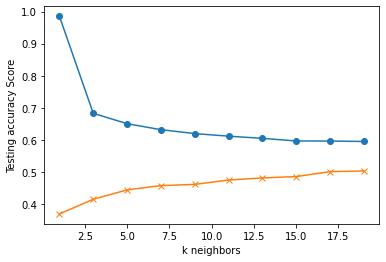

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

## Train the Model

In [15]:
# Note that k: 3 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=WHAT K WAS CHOSEN???? Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=WHAT K WAS CHOSEN???? Test Acc: 0.461


## Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [17]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
model = knn
param_grid = params = [{'n_neighbors': [3, 5, 7, 9],
           'weights': ['uniform', 'distance'],
           'leaf_size': [15, 20]}]
grid = GridSearchCV(model, param_grid, verbose=3)

In [18]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.454, total=   2.9s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.441, total=   2.9s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.7s remaining:    0.0s
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.440, total=   2.3s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neighbors=3, weights=uniform, score=0.447, total=   2.0s
[CV] leaf_size=15, n_neighbors=3, weights=uniform ....................
[CV]  leaf_size=15, n_neigh

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid=[{'leaf_size': [15, 20], 'n_neighbors': [3, 5, 7, 9],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [19]:
print(grid.best_params_)
print(grid.best_score_)

{'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}
0.4841123464267528


## Save the Model

In [23]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'K Nearest Neighbors.sav'
joblib.dump(grid.best_score_, filename)

['K Nearest Neighbors.sav']